<a href="https://colab.research.google.com/github/ozaanme/KAGGLE-SUBMISSIONS/blob/main/DigitRecognizer_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome, digit recognizer kaggle competetions with fastai. I use google colab to train my model, therefore firstly, we install fastai and our dataset to google colab. I use CurlWget to import data from Kaggle.

In [1]:
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab
! pip install fastbook
from fastai.vision.all import * 
from fastbook import * 
import ipywidgets as widgets

In [2]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.115 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: tr-TR;q=0.5" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3004/861823/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1656055364&Signature=WDJ8CJFK%2BnuTOIibQgzSmkySf1ufWBYlMPjoRs5eJQFCiNtscScGHQr%2BrUz7Gsn9FulqYbnfviHNxbw%2FcHMkMkbhLjMTjqVqAuiTYWGLuSY3WlDCrlTt25o1bemqd6xEJWXi6SBWzCw8MP%2FmjibvXqq6vy7ViYo%2BBPA3cGjALkQxMS4fMJ%2F0n3kaon5cpuoiI5efQgYAVE3QVPb9qSzoLRdZlwezk4m46uTM6TuyRXzdt643DQEhWQc74Hyej65K9p%2F%2BoDKeb8nifKlh5FmzPU5knJno06HYLO4q7a4RFVjHT7gs4BRuL8XUgFchrdWVXPzIyxILBdu1f%2BBIkN5qaQ%3D%3D&response-content-disposition=attachment%3B+filename%3Ddigit-recognizer.zip" -c -O 'digit-recognizer.zip'

--2022-06-21 08:08:25--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3004/861823/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1656055364&Signature=WDJ8CJFK%2BnuTOIibQgzSmkySf1ufWBYlMPjoRs5eJQFCiNtscScGHQr%2BrUz7Gsn9FulqYbnfviHNxbw%2FcHMkMkbhLjMTjqVqAuiTYWGLuSY3WlDCrlTt25o1bemqd6xEJWXi6SBWzCw8MP%2FmjibvXqq6vy7ViYo%2BBPA3cGjALkQxMS4fMJ%2F0n3kaon5cpuoiI5efQgYAVE3QVPb9qSzoLRdZlwezk4m46uTM6TuyRXzdt643DQEhWQc74Hyej65K9p%2F%2BoDKeb8nifKlh5FmzPU5knJno06HYLO4q7a4RFVjHT7gs4BRuL8XUgFchrdWVXPzIyxILBdu1f%2BBIkN5qaQ%3D%3D&response-content-disposition=attachment%3B+filename%3Ddigit-recognizer.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.



Lets unzip our file and create an initial path.

In [ ]:
!unzip digit-recognizer.zip

In [4]:
path = Path()

With Pandas we convert csv files to PandasDataFrame. Also we can chechk our dataframe with .head() or .tail() function.

In [5]:
train_df = pd.read_csv(path/'train.csv')
test_df = pd.read_csv(path/'test.csv')

In [6]:
train_df.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

42000 image in dataframe.

As you can see we 42000 images for training set and first column gives us label. We need to seperate label column and pixel values to create our image.

In [7]:
label_train = train_df['label']
pixel_train = train_df.drop('label', axis = 1) ##

In order to create image files we need to conver dataframe to np with .values and then need to reshape it 28x28 array. In this part, we need to apply this method for both training pixels and test pixels.

In [8]:
pixel_train = pixel_train.values.reshape(-1,28,28)
pixel_test = test_df.values.reshape(-1, 28, 28)

Lets check how our image looks.

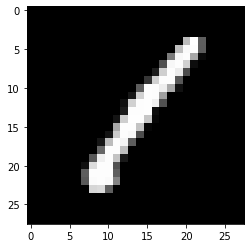

In [9]:
plt.imshow(pixel_train[0], cmap="gray")

Fastai only accepts image files in data block therefore, we need to conver these array to imagefiles. 'category' will store our labels  and in order to name our images we create 'filenames' variable from index. Then, we crate TRAINING_DATA folder to store our images.

In [45]:
category = list(label_train)
filenames = list(label_train.index)
!mkdir TRAINING_DATA
TRAINING_DATA =Path(path/'TRAINING DATA')

mkdir: cannot create directory ‘TRAINING_DATA’: File exists


In this part, we create train_list to use in for loop. As you can see first elements includes index, second includes category which we store labels, and last element includes our pixel array to create image.

In [123]:
train_list =  list(zip(list(label_train.index), category, pixel_train))
train_list[2]

(2,
 1,
 array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3, 141, 139,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9, 254, 254,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9, 254, 254,   8,   0

In this for loop, name will get value of index, digit get value of category which is our label, and image get our image array for each loop. After that we create file_dir according to digit which label. Then create an image from nparray with name of index. In the end, we obtain TRAINING_DATA folder which includes files that stored images according its name which are '0','1', etc. Basicly, we make everything easier to create our dataloader for fastai.

In [46]:
for name, digit, image in train_list:
    file_dir = TRAINING_DATA / str(digit)
    file_dir.mkdir(parents=True, exist_ok=True)
    file_name = f'{name}.png'
    file_path = file_dir / file_name
    plt.imsave(file_path, image)

This part is almost same training part we have done above except in test_list we dont have label since we have to determine them. Therefore, we don't have any subfolders but image files named according their indexes in test.csv file.

In [47]:
!mkdir TEST_DATA
TEST_DATA = Path(path/'TEST_DATA')
test_list = list(zip(list(test_df.index),pixel_test))

In [49]:
for name,image in test_list:
    file_dir = TEST_DATA
    file_dir.mkdir(parents=True, exist_ok=True)
    file_name = f'{name}.png'
    file_path = file_dir / file_name
    plt.imsave(file_path, image)


In [56]:
(path/'TEST_DATA').ls() ##28000 test image
(path/'TRAINING DATA').ls() ##10 Folder for each digit in training data


(#10) [Path('TRAINING DATA/1'),Path('TRAINING DATA/9'),Path('TRAINING DATA/3'),Path('TRAINING DATA/5'),Path('TRAINING DATA/7'),Path('TRAINING DATA/4'),Path('TRAINING DATA/0'),Path('TRAINING DATA/8'),Path('TRAINING DATA/6'),Path('TRAINING DATA/2')]

In [57]:
batch_tfms = [*aug_transforms(do_flip=False,), Normalize.from_stats(*imagenet_stats)]

Now we can create our dataloader from TRAINING_DATA.

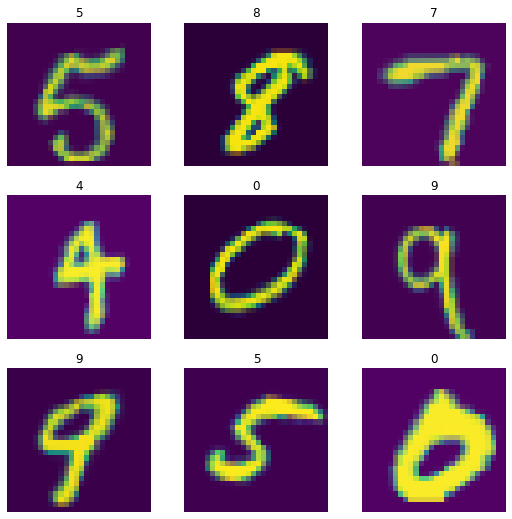

In [58]:
dls = ImageDataLoaders.from_folder(TRAINING_DATA, valid_pct=0.2, batch_tfms=batch_tfms, bs=64)
dls.show_batch()

We use cnn_learner with resnet34 structure.

In [59]:
learn = cnn_learner(dls, resnet34, metrics=accuracy, loss_func=CrossEntropyLossFlat())

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:275: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

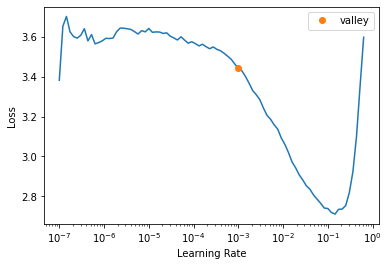

In [60]:
lrs = learn.lr_find()

In [61]:
learn.fine_tune(8,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.665023,0.323468,0.897262,01:00


epoch,train_loss,valid_loss,accuracy,time
0,0.153032,0.103947,0.968095,01:06
1,0.118003,0.064588,0.980000,01:07
2,0.086204,0.064814,0.980238,01:05
3,0.062086,0.035606,0.990595,01:05
4,0.045782,0.029540,0.991310,01:05
5,0.033735,0.022597,0.993571,01:15
6,0.022052,0.022719,0.993810,01:13
7,0.015098,0.022527,0.993810,01:06


As you can see, our accuracy is quite good. Now we need to test our TEST_DATA in this model. Firstly, we get test_files from TEST_DATA folder with get_image_files.

In [69]:
test_files = get_image_files(path/"TEST_DATA")
test_files


Then, create our dl to use in get_preds function.

In [124]:
dl = learn.dls.test_dl(test_files, bs=64)
type(dl)

fastai.data.core.TfmdDL

In [72]:
preds = learn.get_preds(dl=dl, with_decoded=True)

In preds third column includes our label guesses. We conver column of this tensor to list since we want to write them on dataframe.

In [ ]:
Labels = preds[2].tolist()
Labels

We need to create ImageId column

In [119]:
ids = [int(img.stem) + 1 for img in test_files]

submission = pd.DataFrame(ids, columns=['ImageId'])

In [120]:
for o in range(len(Labels)):
    submission.loc[o,'Label']=str(Labels[o])






In [121]:
submission


,ImageId,Label
0,21341,1
1,976,0
2,5778,9
3,3684,6
4,17544,0
...,...,...
27995,23073,1
27996,19913,7
27997,20518,6
27998,21666,6


In [122]:
submission.to_csv("submission.csv",index=False)